In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [4]:
data_m = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/apt_data_month_added.csv', thousands=',', encoding='utf-8')
data_m

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,전월세(만원),...,공원,대형마트,백화점,cctv,주차대수,브랜드,주차관제,승강기,복도유형,난방방식
0,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.00,202001,6,20500,...,0.821341,1.49,4.33,37.0,219.0,0,NaN,NaN,NaN,NaN
1,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.00,202007,9,20500,...,0.821341,1.49,4.33,37.0,219.0,0,NaN,NaN,NaN,NaN
2,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.00,202008,6,20500,...,0.821341,1.49,4.33,37.0,219.0,0,NaN,NaN,NaN,NaN
3,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.00,202008,21,16000,...,0.821341,1.49,4.33,37.0,219.0,0,NaN,NaN,NaN,NaN
4,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.00,202009,7,20000,...,0.821341,1.49,4.33,37.0,219.0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,서울특별시 노원구 하계동,270,270,0,현대,월세,72.20,202009,10,31000,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
3998,서울특별시 노원구 하계동,270,270,0,현대,월세,72.20,202009,10,31000,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
3999,서울특별시 노원구 하계동,270,270,0,현대,월세,84.95,202010,10,41400,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
4000,서울특별시 노원구 하계동,270,270,0,현대,월세,84.95,202011,23,39500,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0


In [5]:
data_y = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/apt_data_year_added.csv', thousands=',', encoding='utf-8')
data_y

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,전월세(만원),...,공원,대형마트,백화점,cctv,주차대수,브랜드,주차관제,승강기,복도유형,난방방식
0,서울특별시 노원구 공릉동,404-3,404,3,건영아파트,전세,84.75,202007,18,34000,...,0.252798,0.88,3.54,37.0,219.0,0,NaN,NaN,NaN,NaN
1,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,84.88,202002,8,35000,...,0.253455,1.24,3.18,37.0,219.0,0,0.0,5.0,0.0,0.0
2,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,84.88,202007,1,40000,...,0.253455,1.24,3.18,37.0,219.0,0,0.0,5.0,0.0,0.0
3,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,59.87,202007,11,27000,...,0.253455,1.24,3.18,37.0,219.0,0,0.0,5.0,0.0,0.0
4,서울특별시 노원구 공릉동,744,744,0,건영장미아파트,전세,59.87,202007,13,28000,...,0.253455,1.24,3.18,37.0,219.0,0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10533,서울특별시 노원구 하계동,270,270,0,현대,전세,84.95,202010,29,60000,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
10534,서울특별시 노원구 하계동,270,270,0,현대,전세,84.95,202011,7,42000,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
10535,서울특별시 노원구 하계동,270,270,0,현대,전세,84.95,202012,2,65000,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0
10536,서울특별시 노원구 하계동,270,270,0,현대,전세,84.95,202012,9,37800,...,0.267815,0.46,2.11,167.0,1386.0,0,0.0,44.0,0.0,2.0


# 월세 (RandomForestRegresser)

In [22]:
data_m = data_m.dropna()

In [23]:
xm = data_m[['전용면적(㎡)', '층', '건축년도', '초등학교', '병원', '공원', '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '승강기', '복도유형', '난방방식']]
ym = data_m[['전월세(만원)']]

In [24]:
ym = np.log(ym)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(xm, ym, test_size=0.2)

In [26]:
params ={
    'n_estimators':[1000],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [27]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)

In [28]:
grid_cv.fit(x_train,y_train)

D:\program\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [1000]})

In [29]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 16,
 'n_estimators': 1000}

In [30]:
grid_cv.score(x_test, y_test)

0.8104465287243581

In [31]:
model = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_leaf=8, min_samples_split=16, random_state=0, n_jobs=-1)

In [32]:
model.fit(x_train, y_train)

<ipython-input-32-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=16,
                      n_estimators=1000, n_jobs=-1, random_state=0)

In [33]:
y_pred = model.predict(x_test)

In [34]:
model.score(x_test, y_test)

0.810446528724358

In [35]:
mean_squared_error(y_test, y_pred)

0.03778629469556131

In [36]:
model.feature_importances_

array([7.93888975e-01, 8.60476241e-03, 6.58420497e-02, 1.89886377e-02,
       2.95006891e-02, 8.97198347e-03, 2.02303518e-02, 1.44730483e-02,
       9.26875967e-03, 9.54532798e-03, 4.58531335e-04, 1.63458844e-02,
       7.91728301e-04, 3.08927054e-03])

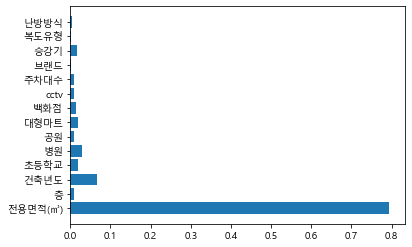

In [37]:
plt.barh(range(14), model.feature_importances_)
plt.yticks(range(14), ['전용면적(㎡)', '층', '건축년도', '초등학교', '병원', '공원', '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '승강기', '복도유형', '난방방식'])
plt.show()

# 전세 (RandomForestRegresser)

In [6]:
data_y = data_y.dropna()

In [7]:
xy = data_y[['전용면적(㎡)', '층', '건축년도', '초등학교', '병원', '공원', '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '승강기', '복도유형', '난방방식']]
yy = data_y[['전월세(만원)']]

In [8]:
yy = np.log(yy)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(xy, yy, test_size=0.2)

In [10]:
params ={
    'n_estimators':[1000],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

In [11]:
rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)

In [12]:
grid_cv.fit(x_train,y_train)

D:\program\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [1000]})

In [13]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 16,
 'n_estimators': 1000}

In [14]:
grid_cv.score(x_test, y_test)

0.8331519353656205

In [15]:
model = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_leaf=8, min_samples_split=16, random_state=0, n_jobs=-1)

In [16]:
model.fit(x_train, y_train)

<ipython-input-16-139fa7af76d2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=8, min_samples_split=16,
                      n_estimators=1000, n_jobs=-1, random_state=0)

In [17]:
y_pred = model.predict(x_test)

In [18]:
model.score(x_test, y_test)

0.8331519353656204

In [19]:
mean_squared_error(y_test, y_pred)

0.035437455595482

In [20]:
model.feature_importances_

array([8.60940657e-01, 1.05214263e-02, 4.32725202e-02, 4.94612171e-03,
       1.68597240e-02, 7.44766158e-03, 1.70840071e-02, 1.21612939e-02,
       5.02371253e-03, 7.03181897e-03, 7.91511812e-04, 7.50585606e-03,
       3.23843555e-04, 6.08984575e-03])

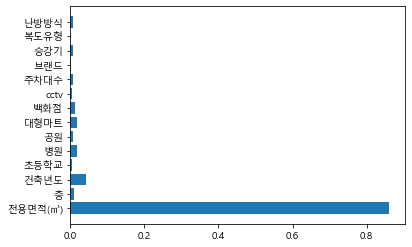

In [21]:
plt.barh(range(14), model.feature_importances_)
plt.yticks(range(14), ['전용면적(㎡)', '층', '건축년도', '초등학교', '병원', '공원', '대형마트', '백화점', 'cctv', '주차대수', '브랜드', '승강기', '복도유형', '난방방식'])
plt.show()